# Padrão

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_excel('fadiga-exercicio.xlsx')

In [ ]:
# a variavel p200.1 só possui 32 valores não nulos, ou seja, aproximademente um terço das outras variáveis.
# Sendo assim, podemos considerar que ela pode ser descartada.
display(df.describe())
print(df.info())

,p200,p4,p38,p34,p200.1,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
count,95.000000,94.000000,94.000000,94.000000,32.000000,94.000000,93.000000,94.000000,94.000000,94.000000,9.400000e+01,94.000000,95.000000,95.000000
mean,0.051681,0.489612,0.221250,0.016491,0.502629,0.049441,0.153262,0.734454,0.000596,0.682043,1.489216e+09,-1.365926,3.270937,1.957895
std,0.011570,0.070073,0.096437,0.026803,0.244166,0.007169,0.012065,0.029814,0.001043,0.121335,1.268584e+10,0.230440,0.339035,0.770683
min,0.032000,0.253520,0.017455,0.000000,0.007157,0.036500,0.131300,0.645600,0.000002,0.406000,4.700000e+04,-2.342000,2.600000,1.000000
25%,0.042431,0.456300,0.160000,0.000000,0.323354,0.045000,0.145000,0.716625,0.000140,0.609500,2.992500e+06,-1.435250,3.025000,1.000000
50%,0.054000,0.500000,0.217943,0.006000,0.517102,0.050000,0.152000,0.739000,0.000251,0.687000,7.330000e+06,-1.339000,3.200000,2.000000
75%,0.056850,0.543000,0.295000,0.017000,0.691421,0.055000,0.162000,0.749800,0.000593,0.751500,2.015000e+07,-1.231000,3.571500,3.000000
max,0.085231,0.617262,0.464000,0.167271,0.964402,0.073000,0.192000,0.870000,0.006330,1.080000,1.230000e+11,-0.818000,4.341000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p200    95 non-null     float64
 1   p4      94 non-null     float64
 2   p38     94 non-null     float64
 3   p34     94 non-null     float64
 4   p200.1  32 non-null     float64
 5   Teor    94 non-null     float64
 6   VMA     93 non-null     float64
 7   VFA     94 non-null     float64
 8   C11     94 non-null     float64
 9   C12     94 non-null     float64
 10  Gamma   94 non-null     float64
 11  Delta   94 non-null     float64
 12  Alpha   95 non-null     float64
 13  Classe  95 non-null     int64  
dtypes: float64(13), int64(1)
memory usage: 10.5 KB
None


In [ ]:
df.drop(columns= ['p200.1'], inplace=True)

In [ ]:
# verificando onde estão localizados os outros valores faltantes, percebemos que na linha 87
# ha 10 colunas sem registros. Sendo assim, podemos concluir que essa linha está com problemas
# e devemos eliminala.
for i in [j for j in df]:
    print(i)
    display(df[df[i].isnull()])

p200


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe


p4


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


p38


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


p34


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


Teor


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


VMA


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.010,2
88,0.04100,0.501,0.301,0.01,0.042,NaN,0.701797,0.000152,0.744,5850000.0,-1.367,3.192,1


VFA


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


C11


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


C12


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


Gamma


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


Delta


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


Alpha


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe


Classe


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe


In [ ]:
df.drop(87, inplace=True)
df.reset_index(inplace=True)
df.drop(columns= ['index'], inplace=True)
display(df.tail(10))

# na linha 87 (antiga linha 88), existe apenas uma das variaveis não preenchdas (VMA).
# Analisando a variável, vemos que sua média é bem próxima da mediana e seu desvio padrão
# eh relativamente baixo. Logo, podemos inputar o valor da média no espaço vazio


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
84,0.040,0.300,0.050,0.000,0.0576,0.159899,0.748543,0.000213,0.681,2.540000e+07,-1.527,3.106,2
85,0.040,0.360,0.160,0.000,0.0534,0.154846,0.743534,0.006330,0.406,1.040000e+08,-1.476,4.050,2
86,0.040,0.300,0.050,0.000,0.0576,0.159899,0.748543,0.003960,0.437,1.620000e+07,-1.373,4.341,3
87,0.041,0.501,0.301,0.010,0.0420,NaN,0.701797,0.000152,0.744,5.850000e+06,-1.367,3.192,1
88,0.062,0.483,0.279,0.000,0.0572,0.173000,0.770000,0.000414,0.644,5.730000e+06,-1.327,3.006,2
89,0.062,0.483,0.279,0.000,0.0588,0.181056,0.779494,0.001350,0.531,4.480000e+07,-1.436,3.231,1
90,0.055,0.509,0.295,0.000,0.0392,0.143000,0.730000,0.000146,0.700,2.000000e+07,-1.318,3.712,1
91,0.051,0.544,0.261,0.056,0.0390,0.149100,0.715500,0.000256,0.663,2.590000e+05,-0.926,3.561,3
92,0.050,0.564,0.341,0.067,0.0380,0.143300,0.710800,0.000260,0.690,4.000000e+09,-1.904,3.695,1
93,0.055,0.503,0.208,0.000,0.0410,0.152600,0.741900,0.000437,0.614,2.000000e+06,-1.189,3.713,1


In [ ]:
df['VMA'][87] = df['VMA'].median()
df.tail(10)

C:\Users\Jovem Senador\AppData\Local\Temp\ipykernel_20256\1552659444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VMA'][87] = df['VMA'].median()


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
84,0.040,0.300,0.050,0.000,0.0576,0.159899,0.748543,0.000213,0.681,2.540000e+07,-1.527,3.106,2
85,0.040,0.360,0.160,0.000,0.0534,0.154846,0.743534,0.006330,0.406,1.040000e+08,-1.476,4.050,2
86,0.040,0.300,0.050,0.000,0.0576,0.159899,0.748543,0.003960,0.437,1.620000e+07,-1.373,4.341,3
87,0.041,0.501,0.301,0.010,0.0420,0.152000,0.701797,0.000152,0.744,5.850000e+06,-1.367,3.192,1
88,0.062,0.483,0.279,0.000,0.0572,0.173000,0.770000,0.000414,0.644,5.730000e+06,-1.327,3.006,2
89,0.062,0.483,0.279,0.000,0.0588,0.181056,0.779494,0.001350,0.531,4.480000e+07,-1.436,3.231,1
90,0.055,0.509,0.295,0.000,0.0392,0.143000,0.730000,0.000146,0.700,2.000000e+07,-1.318,3.712,1
91,0.051,0.544,0.261,0.056,0.0390,0.149100,0.715500,0.000256,0.663,2.590000e+05,-0.926,3.561,3
92,0.050,0.564,0.341,0.067,0.0380,0.143300,0.710800,0.000260,0.690,4.000000e+09,-1.904,3.695,1
93,0.055,0.503,0.208,0.000,0.0410,0.152600,0.741900,0.000437,0.614,2.000000e+06,-1.189,3.713,1


# Primeiro Projeto

In [ ]:
df3 = df
df3_alter = df3.drop(columns=['Classe'])
df3_alter_entradas = df3_alter.drop(columns=['Delta','Alpha','C11','C12', 'Gamma'])
df3_alter_saidas = df3_alter.filter(items= ['C11','C12','Gamma','Delta','Alpha'])

In [ ]:
# vizando uma melhor vizualização e comparação dos dados, utilizarei o processo de nomalização
# exceto para a coluna 'Classe' pois trata-se  de uma inferência logística

scaler = MinMaxScaler()

dados_normalizados = scaler.fit_transform(df3_alter)
dados_normalizados = pd.DataFrame(dados_normalizados)
dados_normalizados.columns = ['p200',	'p4',	'p38',	'p34',	'Teor',	'VMA',	'VFA','C11','C12','Gamma','Delta','Alpha']

dados_entrada_normalizados = scaler.fit_transform(df3_alter_entradas)
dados_entrada_normalizados = pd.DataFrame(dados_entrada_normalizados)
dados_entrada_normalizados.columns = ['p200',	'p4',	'p38',	'p34',	'Teor',	'VMA',	'VFA']

dados_saida_normalizados = scaler.fit_transform(df3_alter_saidas)
dados_saida_normalizados = pd.DataFrame(dados_saida_normalizados)
dados_saida_normalizados.columns = ['C11','C12','Gamma','Delta','Alpha']

In [ ]:
outliers_geral = Indentificar_outliers(dados_normalizados)
display(outliers_geral)
dados_sem_out = dados_normalizados.drop(outliers_geral.index.to_list())

NameError: name 'chi2' is not defined

<AxesSubplot: >

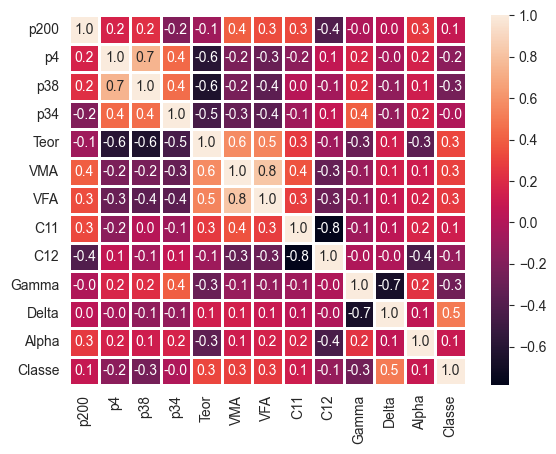

In [ ]:
dados_sem_out['Classe'] = df3['Classe']
correlation = dados_sem_out.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=2)
display(plot)

In [ ]:
dados_modelo1 = dados_sem_out.filter(['p200','Teor','VMA','C11'])
dados_modelo2 = dados_sem_out.filter(['p200','VMA','C12'])
dados_modelo3 = dados_sem_out.filter(['p34', 'Teor','Gamma'])
dados_modelo4 = dados_sem_out.filter(['p38',	'Teor',	'VMA', 'Delta'])
dados_modelo5 = dados_sem_out.filter(['p200','Teor','Alpha'])
dados_modelo6 = dados_sem_out.filter(['p200','p4','p38','p34','Teor','VMA','VFA', 'Classe'])
l= [dados_modelo1, dados_modelo2,
      dados_modelo3, dados_modelo4, dados_modelo5, dados_modelo6]


for i in l:

    print('var', i.iloc[:,-1].name)
    print('minio',i.iloc[:,-1].min())
    print('maximo',i.iloc[:,-1].max())
    print('media',i.iloc[:,-1].mean())
    print('mediana',i.iloc[:,-1].median())
    print('desvio padrao',i.iloc[:,-1].std())


    X = i.iloc[:,:-1]
    y = i.iloc[:,-1]

    # Divide os dados em treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

    # Cria o modelo de regressão linear
    model = LinearRegression()

    # Treina o modelo com os dados de treinamento
    model.fit(X_train, y_train)

    # Avalia o desempenho do modelo com os dados de teste
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')

    # Exibe os resultados
    print('MSE:', mse)
    print('R²:', r2)
    print()

var C11
minio 0.0
maximo 0.3378142814020637
media 0.06604846037203005
mediana 0.040067767359459376
desvio padrao 0.07014009401687585
MSE: 0.002114093245238133
R²: 0.5008680200222309

var C12
minio 0.1394658753709198
maximo 0.9258160237388724
media 0.4070108326480996
mediana 0.413946587537092
desvio padrao 0.13879829809683014
MSE: 0.011166424383543804
R²: 0.49228232782887626

var Gamma
minio 0.0
maximo 0.03251995551575536
media 0.0016285202618138445
mediana 4.717887981631993e-05
desvio padrao 0.00586231297959105
MSE: 1.76438930470819e-06
R²: -45.26203044699054

var Delta
minio 0.24540682414698178
maximo 1.0
media 0.6520017076178731
mediana 0.6607611548556431
desvio padrao 0.14024489393264536
MSE: 0.005062047569024661
R²: 0.11390025590784314

var Alpha
minio 0.06318207926479014
maximo 0.6886846639862148
media 0.3802550812093865
mediana 0.34118322802986767
desvio padrao 0.17849570592436612
MSE: 0.03145510172397945
R²: 0.03631054567138081

var Classe
minio 1
maximo 3
media 1.96385542168674

In [ ]:
for i in l:


    print('minimo',i.iloc[:,-1].min())
    print('maximo',i.iloc[:,-1].max())
    print('media',i.iloc[:,-1].mean())
    print('mediana',i.iloc[:,-1].median())
    print('desvio padrao',i.iloc[:,-1].std())
    print('var', i.iloc[:,-1].name)


    X = i.iloc[:,:-1]
    y = i.iloc[:,-1]

    # Divide os dados em treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

    # Cria o modelo de regressão linear
    model = LinearRegression()

    # Treina o modelo com os dados de treinamento
    model.fit(X_train, y_train)

    # Avalia o desempenho do modelo com os dados de teste
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')

    # Exibe os resultados
    print('MSE:', mse)
    print('R²:', r2)
    print()

minimo 0.0
maximo 0.3378142814020637
media 0.06604846037203005
mediana 0.040067767359459376
desvio padrao 0.07014009401687585
var C11
MSE: 0.002114093245238133
R²: 0.5008680200222309

minimo 0.1394658753709198
maximo 0.9258160237388724
media 0.4070108326480996
mediana 0.413946587537092
desvio padrao 0.13879829809683014
var C12
MSE: 0.011166424383543804
R²: 0.49228232782887626

minimo 0.0
maximo 0.03251995551575536
media 0.0016285202618138445
mediana 4.717887981631993e-05
desvio padrao 0.00586231297959105
var Gamma
MSE: 1.76438930470819e-06
R²: -45.26203044699054

minimo 0.24540682414698178
maximo 1.0
media 0.6520017076178731
mediana 0.6607611548556431
desvio padrao 0.14024489393264536
var Delta
MSE: 0.005062047569024661
R²: 0.11390025590784314

minimo 0.06318207926479014
maximo 0.6886846639862148
media 0.3802550812093865
mediana 0.34118322802986767
desvio padrao 0.17849570592436612
var Alpha
MSE: 0.03145510172397945
R²: 0.03631054567138081

minimo 1
maximo 3
media 1.963855421686747
med